In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from functools import reduce
import re as re
sns.set()

In [4]:
for file in os.listdir("Data"):
    if file.endswith(".csv"):
        filepath = os.path.join("Data/", file)
df = pd.read_csv(filepath)

In [7]:
df

,Protein State,Start,End,Sequence,Deut Time (sec),maxD,#D,%D,Conf Interval (#D),#Pts,Confidence,Stddev,p
0,FnCas12a,7,13,FVNKYSL,10,5,0.658,13.157,0.229,2.0,Medium,0.026,NaN
1,FnCas12a,7,13,FVNKYSL,120,5,1.433,28.651,0.106,2.0,Medium,0.012,NaN
2,FnCas12a,7,13,FVNKYSL,600,5,2.425,48.508,3.174,2.0,Medium,0.353,NaN
3,FnCas12a,7,13,FVNKYSL,1800,5,2.880,57.594,NaN,1.0,Medium,0.000,NaN
4,FnCas12a,7,13,FVNKYSL,7200,5,3.084,61.682,3.650,2.0,Medium,0.406,NaN
5,FnCas12a,7,15,FVNKYSLSK,10,7,1.273,18.192,0.234,4.0,Medium,0.147,NaN
6,FnCas12a,7,15,FVNKYSLSK,120,7,2.714,38.773,0.445,4.0,Medium,0.279,NaN
7,FnCas12a,7,15,FVNKYSLSK,600,7,4.460,63.720,0.222,4.0,Medium,0.139,NaN
8,FnCas12a,7,15,FVNKYSLSK,1800,7,4.839,69.133,0.190,4.0,Medium,0.119,NaN
9,FnCas12a,7,15,FVNKYSLSK,7200,7,4.953,70.757,0.104,4.0,Medium,0.065,NaN


In [5]:
FnCas12a = df[df['Protein State']=="FnCas12a"]
FnCas12a_crRNA = df[df['Protein State']=="FnCas12a-crRNA"]
FnCas12a_crRNA_activator = df[df['Protein State']=="FnCas12a-crRNA-activator"]
FnCas12a = FnCas12a.drop('Protein State', axis =1)
FnCas12a_crRNA = FnCas12a_crRNA.drop('Protein State', axis =1)
FnCas12a_crRNA_activator = FnCas12a_crRNA_activator.drop('Protein State', axis =1)

In [6]:
apo = FnCas12a.copy()
bi = FnCas12a_crRNA.copy()
tr = FnCas12a_crRNA_activator.copy()
frames = [apo, bi, tr]

In [10]:
frames

[     Start   End                 Sequence  Deut Time (sec)  maxD      #D  \
 0        7    13                  FVNKYSL               10     5   0.658   
 1        7    13                  FVNKYSL              120     5   1.433   
 2        7    13                  FVNKYSL              600     5   2.425   
 3        7    13                  FVNKYSL             1800     5   2.880   
 4        7    13                  FVNKYSL             7200     5   3.084   
 5        7    15                FVNKYSLSK               10     7   1.273   
 6        7    15                FVNKYSLSK              120     7   2.714   
 7        7    15                FVNKYSLSK              600     7   4.460   
 8        7    15                FVNKYSLSK             1800     7   4.839   
 9        7    15                FVNKYSLSK             7200     7   4.953   
 10       7    19            FVNKYSLSKTLRF               10    11   2.072   
 11       7    19            FVNKYSLSKTLRF              120    11   3.166   

In [11]:
apo.columns

Index(['Start', 'End', 'Sequence', 'Deut Time (sec)', 'maxD', '#D', '%D',
       'Conf Interval (#D)', '#Pts', 'Confidence', 'Stddev', 'p'],
      dtype='object')

In [7]:
df1 = reduce(lambda  left,right: pd.merge(left,right,on=['Start', 'End', 'Sequence', 'Deut Time (sec)', 'maxD'],
                                          how='outer'), frames)

##### There are a total of 194 unique peptides.

In [8]:
df1.columns = ['Start', 'End', 'Sequence', 'Deut Time (sec)', 'maxD', '#D_apo', '%D_apo',
       'Conf Interval (#D)_apo', '#Pts_apo', 'Confidence_apo', 'Stddev_apo', 'p_apo',
       '#D_bi', '%D_bi', 'Conf Interval (#D)_bi', '#Pts_bi', 'Confidence_bi',
       'Stddev_bi', 'p_bi', '#D_tr', '%D_tr', 'Conf Interval (#D)_tr', '#Pts_tr',
       'Confidence_tr', 'Stddev_tr', 'p_tr']
df1.columns

Index(['Start', 'End', 'Sequence', 'Deut Time (sec)', 'maxD', '#D_apo',
       '%D_apo', 'Conf Interval (#D)_apo', '#Pts_apo', 'Confidence_apo',
       'Stddev_apo', 'p_apo', '#D_bi', '%D_bi', 'Conf Interval (#D)_bi',
       '#Pts_bi', 'Confidence_bi', 'Stddev_bi', 'p_bi', '#D_tr', '%D_tr',
       'Conf Interval (#D)_tr', '#Pts_tr', 'Confidence_tr', 'Stddev_tr',
       'p_tr'],
      dtype='object')

In [14]:
df1.head()

,Start,End,Sequence,Deut Time (sec),maxD,#D_apo,%D_apo,Conf Interval (#D)_apo,#Pts_apo,Confidence_apo,...,Confidence_bi,Stddev_bi,p_bi,#D_tr,%D_tr,Conf Interval (#D)_tr,#Pts_tr,Confidence_tr,Stddev_tr,p_tr
0,7,13,FVNKYSL,10,5,0.658,13.157,0.229,2.0,Medium,...,Medium,0.011,0.013375,0.171,3.410,0.387,2.0,Medium,0.043,0.011209
1,7,13,FVNKYSL,120,5,1.433,28.651,0.106,2.0,Medium,...,Medium,0.011,0.000659,0.794,15.878,0.441,2.0,Medium,0.049,0.026255
2,7,13,FVNKYSL,600,5,2.425,48.508,3.174,2.0,Medium,...,Medium,0.097,0.088291,0.825,16.491,0.104,2.0,Medium,0.012,0.098001
3,7,13,FVNKYSL,1800,5,2.880,57.594,NaN,1.0,Medium,...,Medium,0.105,1.000000,1.002,20.038,0.805,2.0,Medium,0.090,1.000000
4,7,13,FVNKYSL,7200,5,3.084,61.682,3.650,2.0,Medium,...,Medium,0.009,0.100480,1.017,20.344,0.599,2.0,Medium,0.067,0.080870


In [15]:
peptides = [i for i in df1['Sequence'].unique()]

ValueError: In safezip, len(args[0])=5 but len(args[1])=0

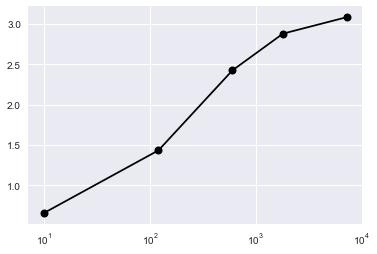

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.backends.backend_pdf import PdfPages
 
peptides = [i for i in df1['Sequence'][:10].unique()]

for p in peptides:
    df2 = df1[df1.Sequence== p]
    
# Create data

    a = (df2['Deut Time (sec)'], df2['#D_apo'])

    b = (df2['Deut Time (sec)'], df2['#D_bi'])

    c = (df2['Deut Time (sec)'], df2['#D_tr'])
    
    # Errors
    a_std =  df2['Stddev_apo'].values.tolist()
    b_std =  df2['Stddev_bi'].values.tolist()
    c_std =  df2['Stddev_tr'].values.tolist()
    
    errors = (a_std, b_std, c_std)
    

 
    data = (a, b, c)
    colors = ("black", "blue", "red")
    groups = ("apo",  "binary", "ternary") 
 
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1,1)
    ax.set_xscale('log')
 
    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax.scatter(x, y, c=color, edgecolors='none', s=30, label = None )
        ax.plot(x,y,c=color, label = group)
        
        # Plotting errors
        (_, caps, _) = ax.errorbar(x, y, yerr=error, fmt='o', markersize=8, capsize=5, label = None, c= color)

        for cap in caps:
            cap.set_markeredgewidth(1)
            
    plt.xlim(1, 10000)
    plt.ylim(ymin=0)

    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
    plt.rc("font") 


    plt.xlabel('time (s)', fontdict = font)
    plt.ylabel("Number of D",fontdict = font)
    
    
    plt.title(p ,fontdict = font)
    plt.legend(fontsize = 15,loc=2)


    plt.tight_layout()
    
    plt.savefig(p + '.pdf', format='pdf', dpi=200)

    plt.show()

In [10]:
new_df= df1.copy()

In [14]:
new_df['pepn']=  df1['Sequence'] + df1.Start.astype("str").apply(lambda x: " (" + x + "-") + df1.End.astype("str").apply(lambda x: x + ")")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 969
Data columns (total 27 columns):
Start                     970 non-null int64
End                       970 non-null int64
Sequence                  970 non-null object
Deut Time (sec)           970 non-null int64
maxD                      970 non-null int64
#D_apo                    904 non-null float64
%D_apo                    904 non-null float64
Conf Interval (#D)_apo    854 non-null float64
#Pts_apo                  904 non-null float64
Confidence_apo            904 non-null object
Stddev_apo                904 non-null float64
p_apo                     0 non-null float64
#D_bi                     908 non-null float64
%D_bi                     908 non-null float64
Conf Interval (#D)_bi     855 non-null float64
#Pts_bi                   908 non-null float64
Confidence_bi             908 non-null object
Stddev_bi                 908 non-null float64
p_bi                      852 non-null float64
#D_tr          

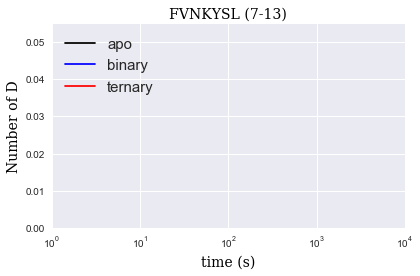

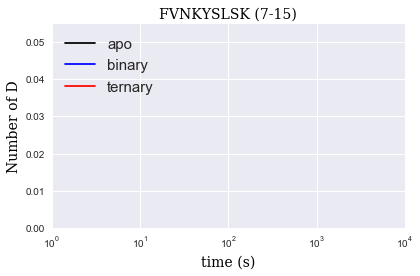

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

 
peptides = [i for i in new_df['pepn'][:10].unique()]

for p in peptides:
    new_df2 = df1[df1.Sequence== p]
    
# Create data

    a = (new_df2['Deut Time (sec)'], new_df2['#D_apo'])

    b = (new_df2['Deut Time (sec)'], new_df2['#D_bi'])

    c = (new_df2['Deut Time (sec)'], new_df2['#D_tr'])

    #plt.errorbar(x, y, yerr=e, fmt='o')
    a_std =  new_df2['Stddev_apo'].values.tolist()
    b_std =  new_df2['Stddev_bi'].values.tolist()
    c_std =  new_df2['Stddev_tr'].values.tolist()
    
    errors = (a_std, b_std, c_std)
 
    data = (a, b, c)
    colors = ("black", "blue", "red")
    groups = ("apo",  "binary", "ternary") 
 
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1,1)
    ax.set_xscale('log')
 
    for data, color, group, error in zip(data, colors, groups, errors):
        x, y = data
        ax.scatter(x, y, c=color, edgecolors='none', s=30, label = None )
        ax.plot(x,y,c=color, label = group)
        
        #(_, caps, _) = ax.errorbar(x, y, yerr=error, fmt='o', markersize=8, capsize=5, label = None, c= color)

        #for cap in caps:
            #cap.set_markeredgewidth(1)
        #ax.errorbar(x,y, yerr=error, fmt='o', markersize=8, capsize=40)
        
    plt.xlim(1, 10000)
    plt.ylim(ymin=0)

    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
    plt.rc("font") 


    plt.xlabel('time (s)', fontdict = font)
    plt.ylabel("Number of D",fontdict = font)
    
    
    plt.title(p ,fontdict = font)
    plt.legend(fontsize = 15,loc=2)


    plt.tight_layout()
    

    plt.savefig(p + '.pdf', format='pdf', dpi=200)
    
    plt.show()
    
    #with PdfPages(p + '.pdf') as pdf:
    #As many times as you like, create a figure fig and save it:
        #fig = plt.figure()
        #pdf.savefig(fig)